In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [2]:
df1=pd.read_excel(r"C:\Users\admin\Desktop\Logistic Regression on heart diesease.xlsx")

In [7]:
df1.shape

(1499, 16)

In [5]:
print(df1)

      sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0       1   39        4.0              0         0.0     0.0                0   
1       0   46        2.0              0         0.0     0.0                0   
2       1   48        1.0              1        20.0     0.0                0   
3       0   61        3.0              1        30.0     0.0                0   
4       0   46        3.0              1        23.0     0.0                0   
...   ...  ...        ...            ...         ...     ...              ...   
1494    0   58        2.0              1         3.0     0.0                0   
1495    0   57        4.0              0         0.0     0.0                0   
1496    0   40        3.0              1        15.0     0.0                0   
1497    1   55        1.0              1         NaN     0.0                0   
1498    0   43        3.0              1        20.0     0.0                0   

      prevalentHyp  diabete

In [6]:
df1.rename(columns={'male':'Sex_male'},inplace=True)

In [7]:
df1.isnull().sum()

sex                  0
age                  0
education           44
currentSmoker        0
cigsPerDay           7
BPMeds              19
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             18
sysBP                0
diaBP                0
BMI                  5
heartRate            1
glucose            128
TenYearCHD           0
dtype: int64

In [8]:
Count=0
for i in df1.isnull().sum(axis=1):
    if i >0:
        Count = Count+1
print("Total number of rows with missing values is", Count)
print('since it is only',round((Count/len(df1.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is 201
since it is only 13 percent of the entire dataset the rows with missing values are excluded.


In [9]:
df1.dropna(axis=0,inplace=True)

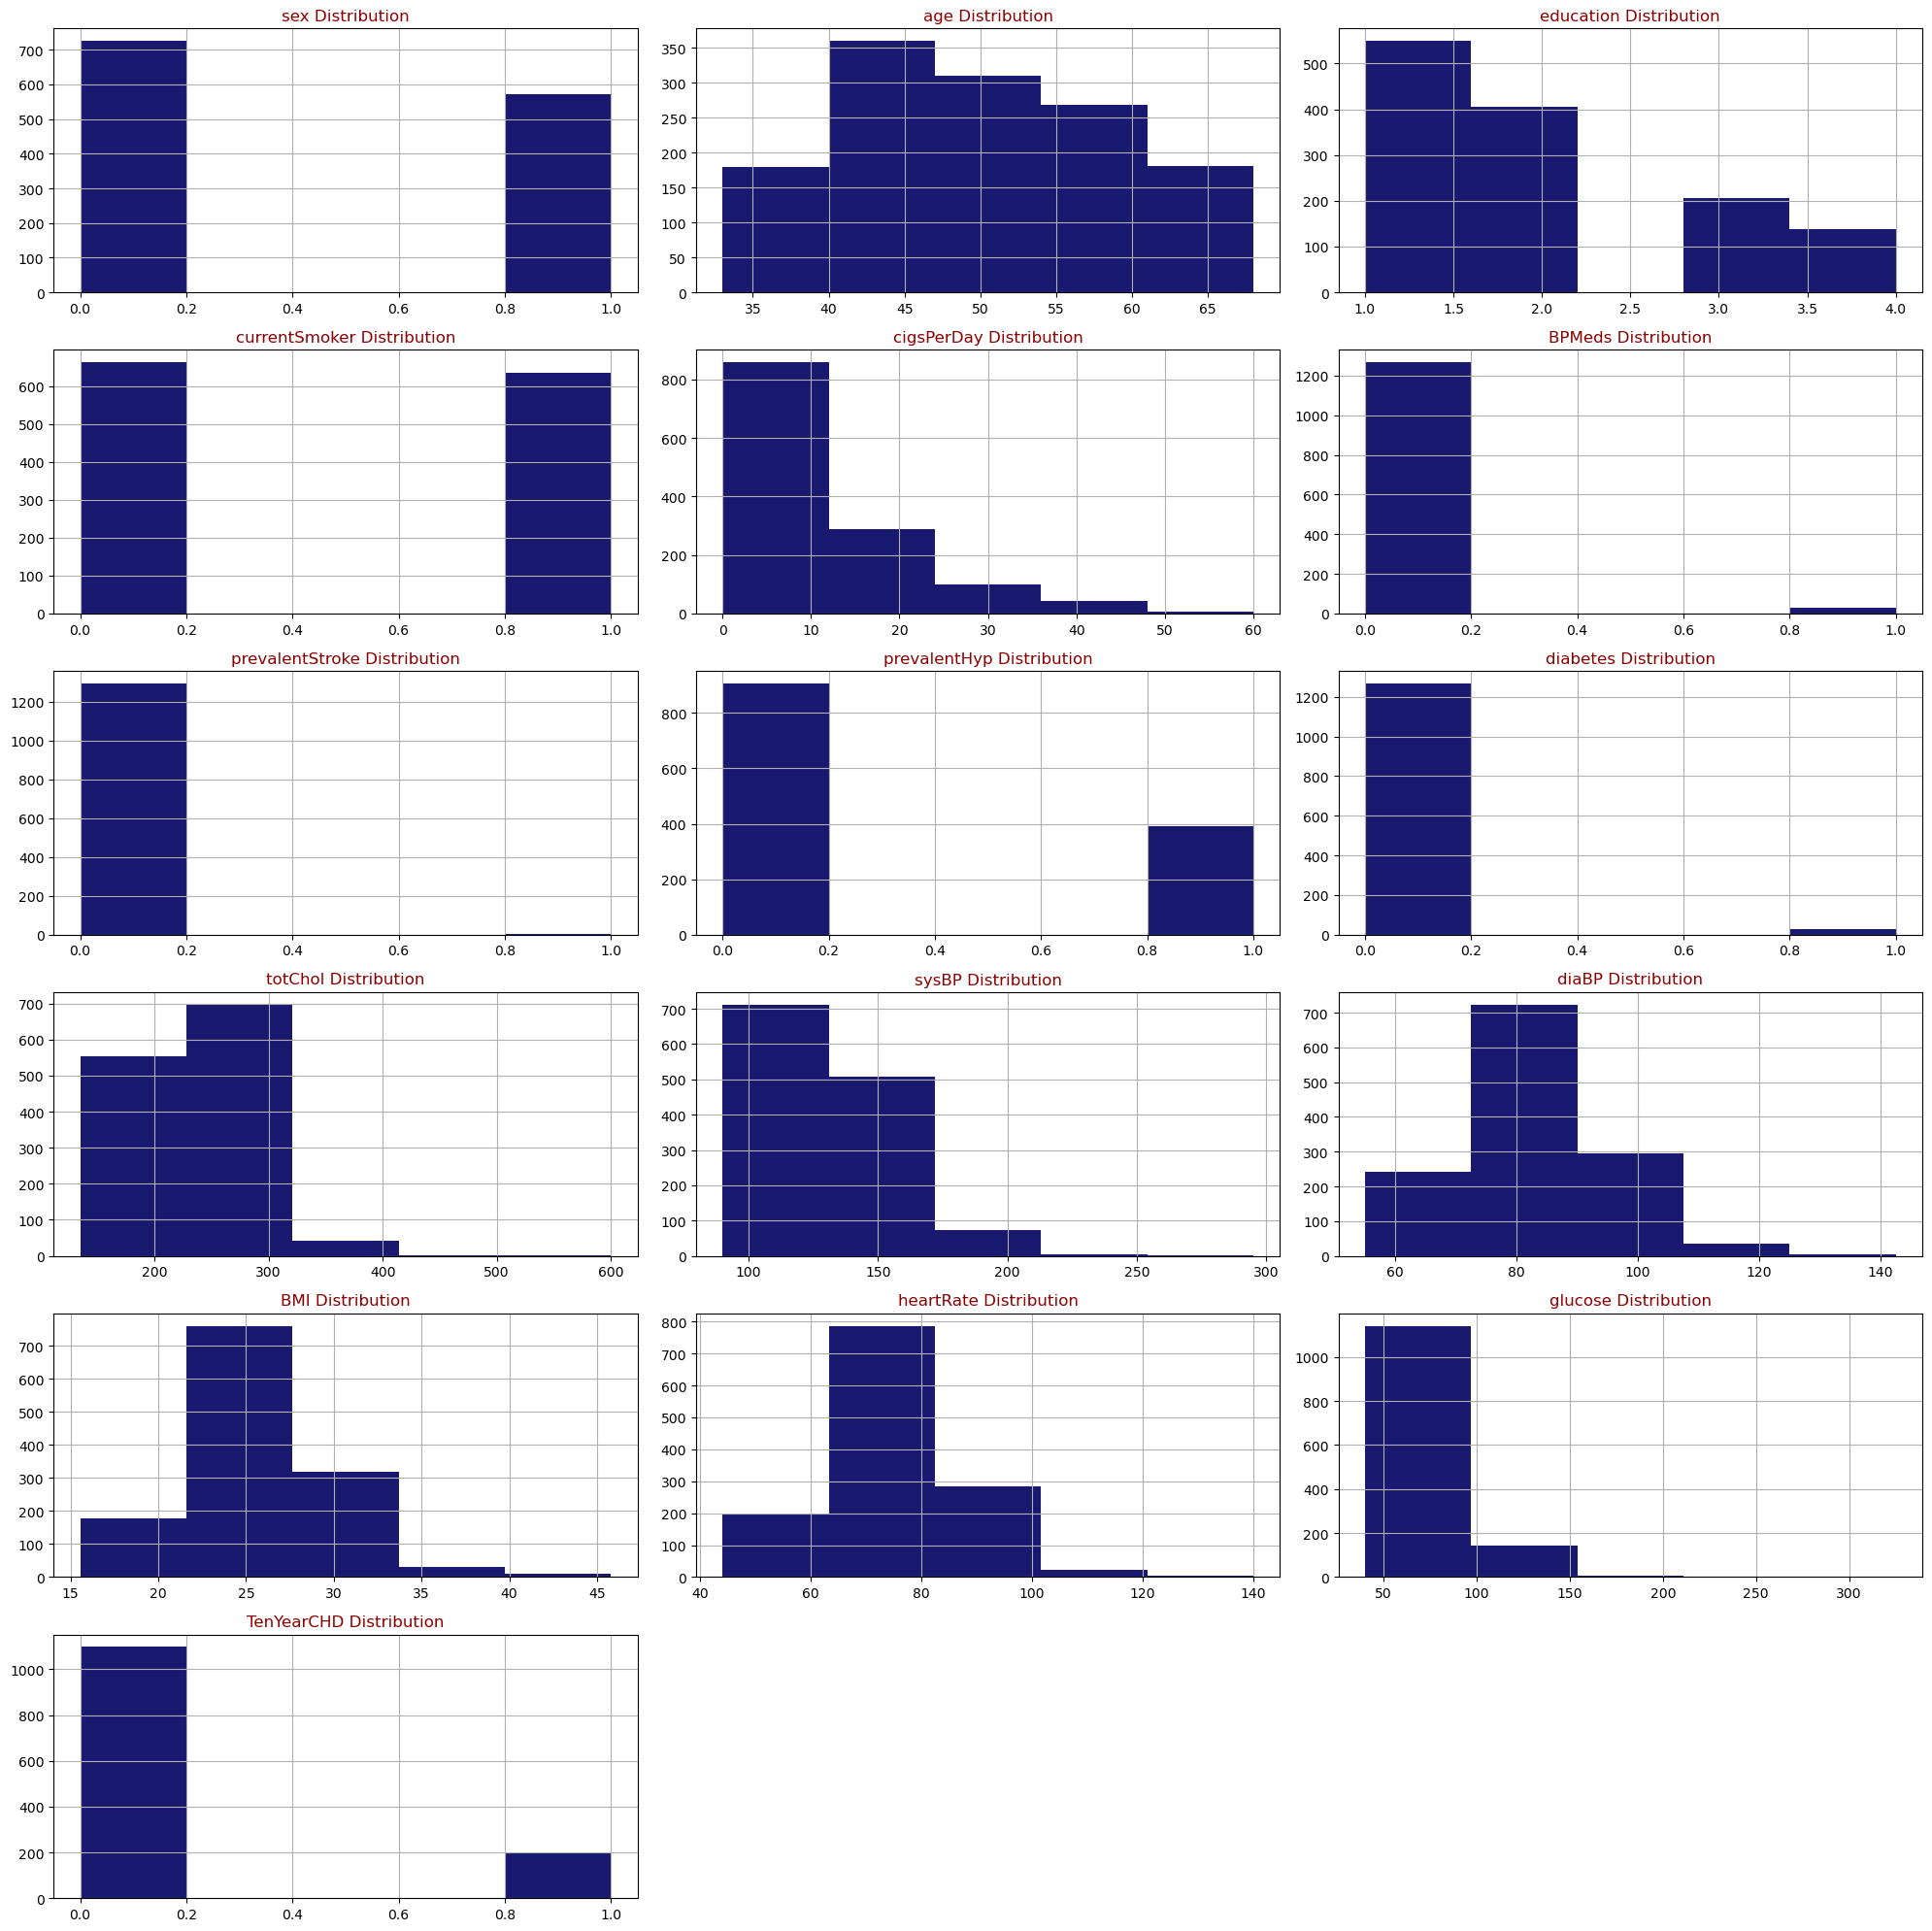

In [13]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=5,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df1,df1.columns,6,3)

In [14]:
df1.TenYearCHD.value_counts()

TenYearCHD
0    1097
1     201
Name: count, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

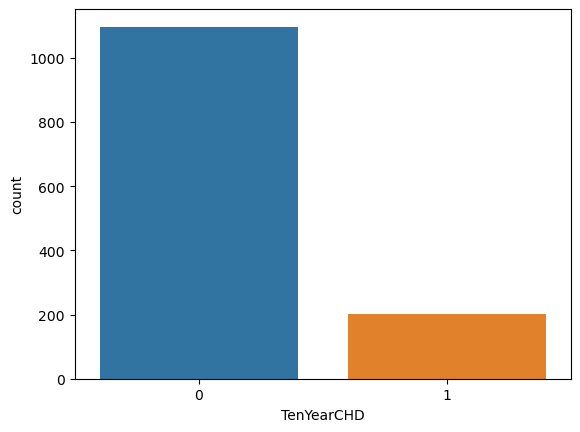

In [15]:
sns.countplot(x = 'TenYearCHD', data=df1)

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


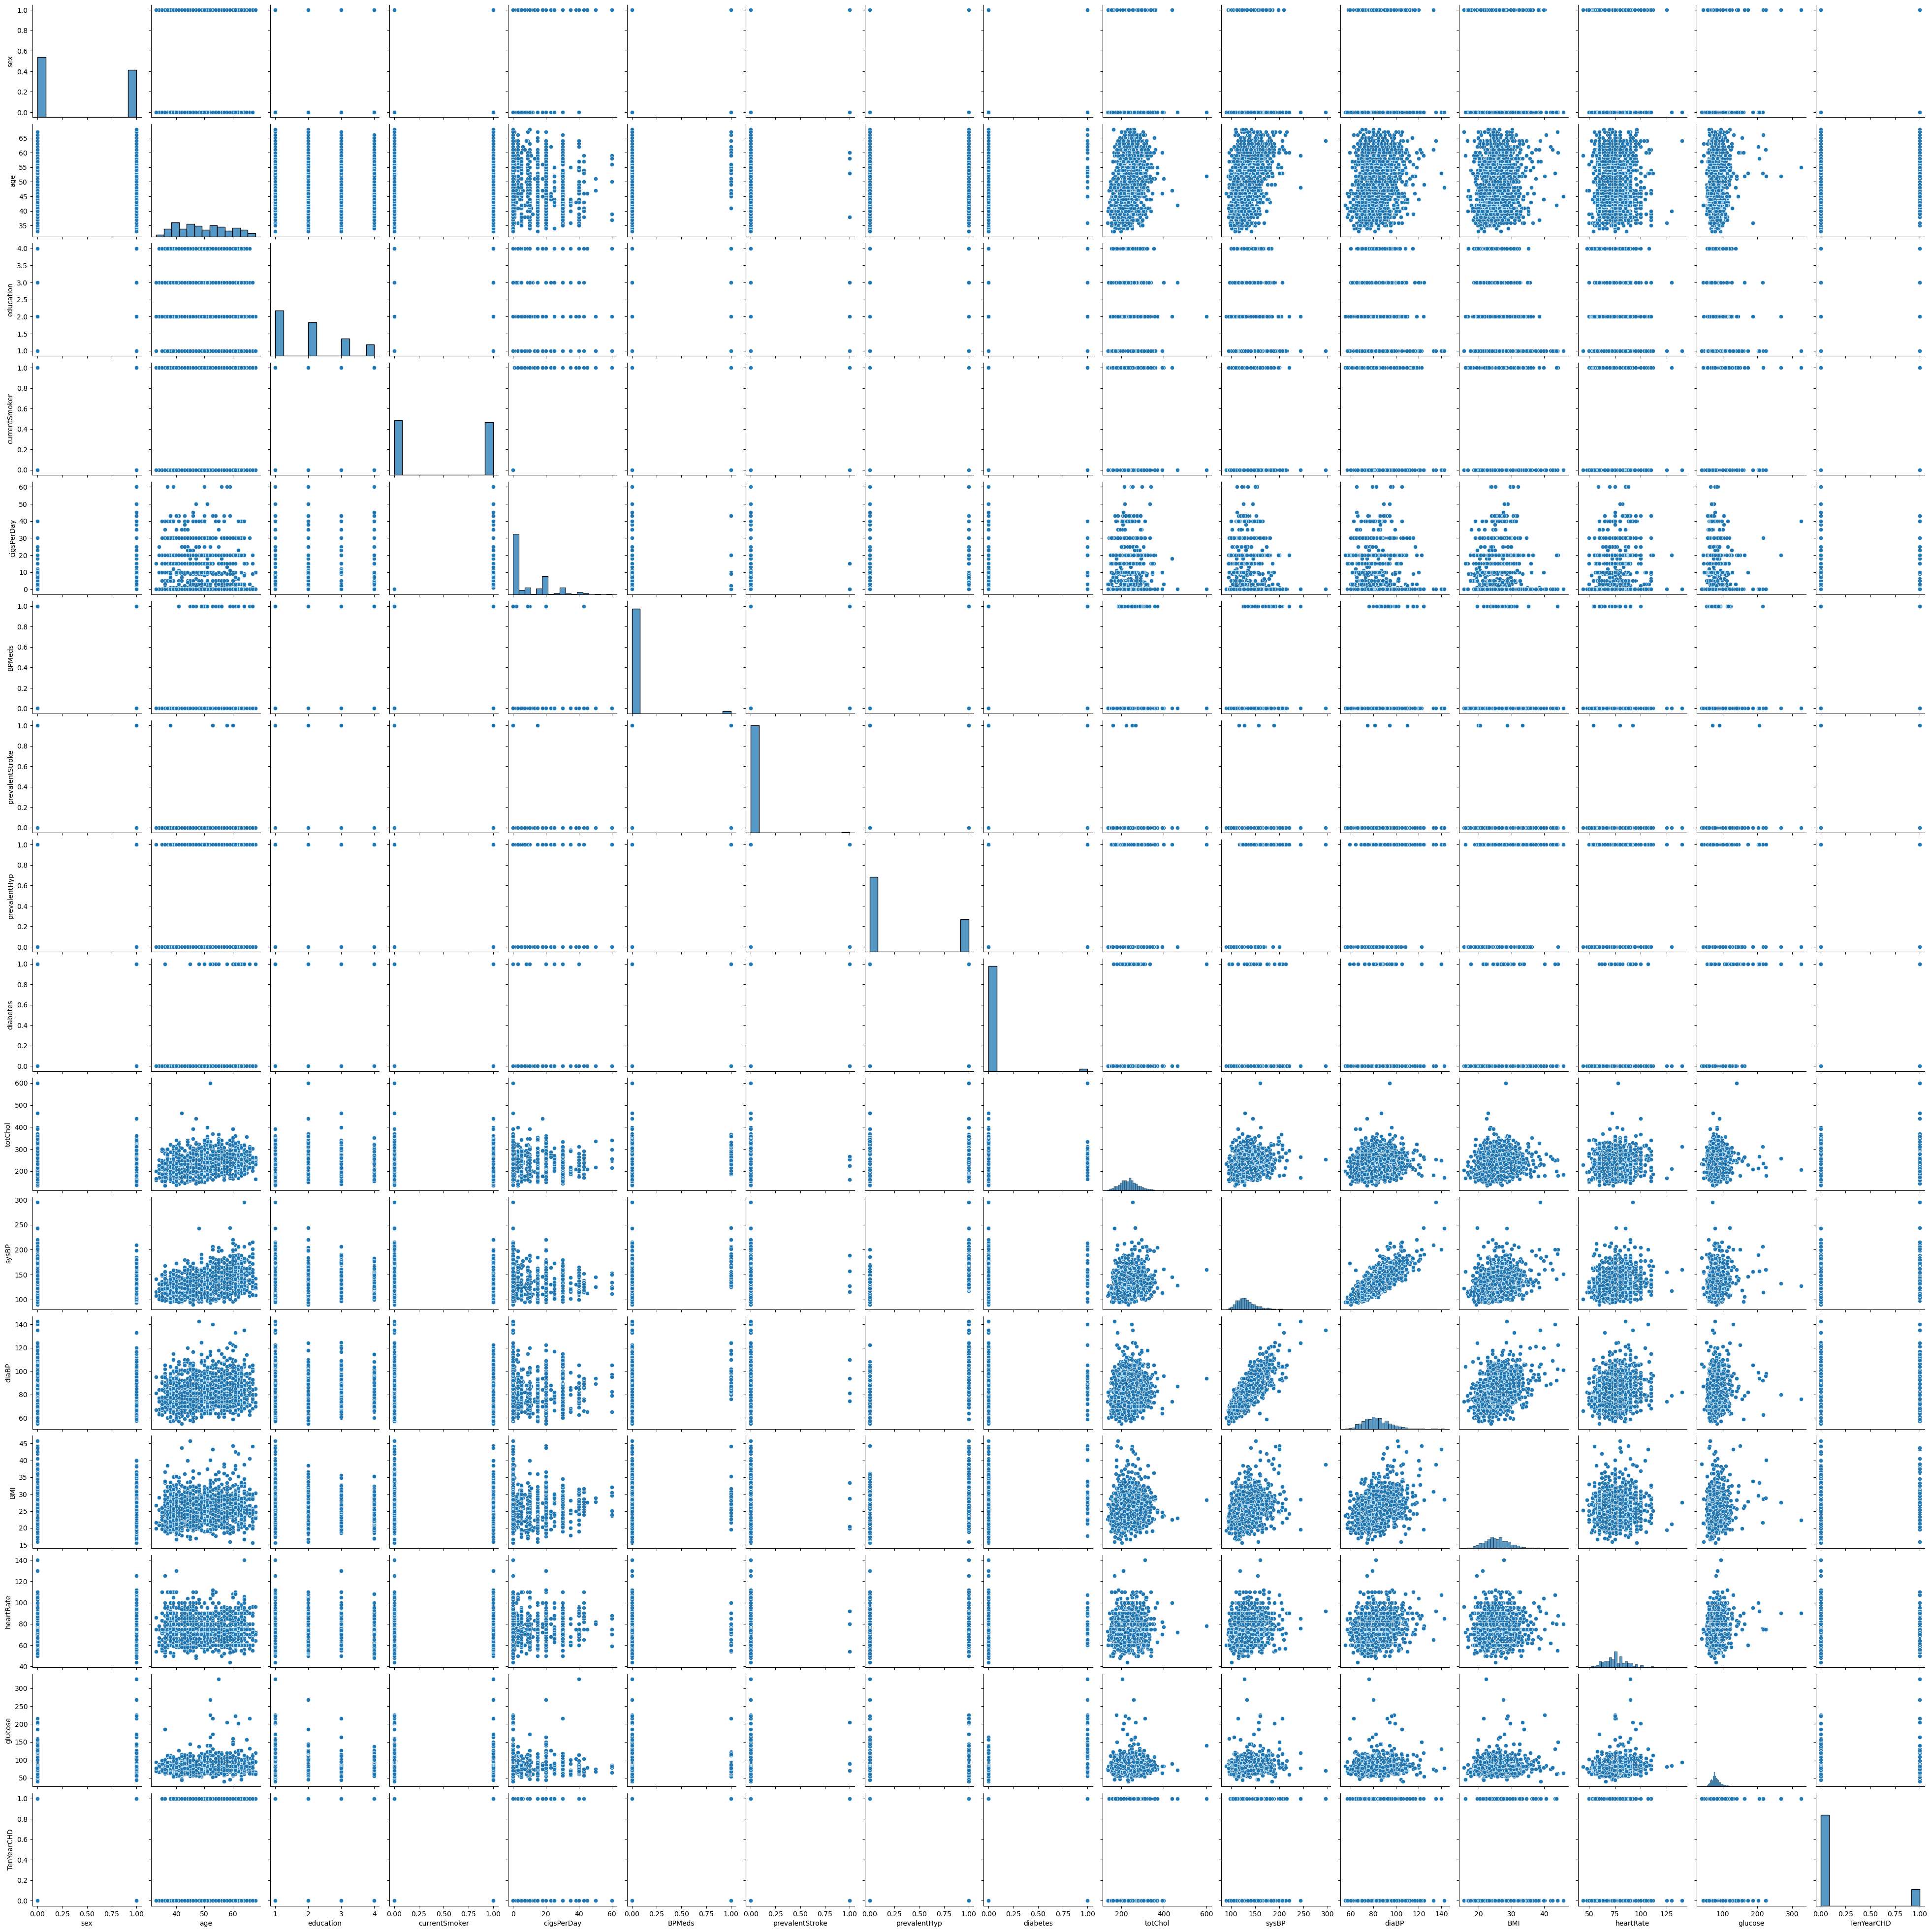

In [16]:
sns.pairplot(data=df1)

In [17]:
df1.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000
mean,0.441448,49.661017,1.948382,0.489214,9.046225,0.023883,0.003082,0.302003,0.023112,237.491525,132.413328,82.824345,25.724538,75.531587,81.395223,0.154854
std,0.496751,8.680167,1.002519,0.500076,12.166705,0.152743,0.055448,0.459304,0.150319,44.190504,21.945313,11.904382,4.020122,11.746986,19.350802,0.361905
min,0.000000,33.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.000000,90.000000,55.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,207.000000,117.500000,74.000000,23.052500,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237.000000,128.000000,82.000000,25.325000,75.000000,78.000000,0.000000
75%,1.000000,57.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,68.000000,4.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,45.800000,140.000000,325.000000,1.000000


In [18]:
from statsmodels.tools import add_constant as add_constant
df1_constant = add_constant(df1)
df1_constant.head()

,const,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [19]:
df1.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=df1_constant.columns[:-1]
model=sm.Logit(df1.TenYearCHD,df1_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.387305
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 1298
Model:                          Logit   Df Residuals:                     1282
Method:                           MLE   Df Model:                           15
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.1015
Time:                        12:38:19   Log-Likelihood:                -502.72
converged:                       True   LL-Null:                       -559.49
Covariance Type:            nonrobust   LLR p-value:                 3.379e-17
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.0297      1.180     -6.808      0.000     -10.342      -5.718
sex                 0.3500      0.182      1.928      0.054      -0.006       0.706
age                 0.0559      0.011      5.056      0.000       0.034       0.078
education           0.0325      0.082      0.395      0.693      -0.129       0.194
currentSmoker       0.2623      0.250      1.050      0.294      -0.228       0.752
cigsPerDay          0.0156      0.010      1.575      0.115      -0.004       0.035
BPMeds              0.0348      0.447      0.078      0.938      -0.842       0.911
prevalentStroke     0.1011      1.274      0.079      0.937      -2.395       2.598
prevalentHyp        0.3030      0.227      1.336      0.182      -0.142       0.748
diabetes            0.1067      0.515      0.207      0.836      -0.903       1.117
totChol             0.0036      0.002      1.937      0.053   -4.22e-05       0.007
sysBP               0.0138      0.006      2.185      0.029       0.001       0.026
diaBP              -0.0073      0.011     -0.641      0.522      -0.030       0.015
BMI                 0.0351      0.021      1.647      0.100      -0.007       0.077
heartRate          -0.0111      0.007     -1.517      0.129      -0.025       0.003
glucose             0.0072      0.004      1.696      0.090      -0.001       0.016
===================================================================================
"""

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(df1_constant,df1.TenYearCHD,cols)

In [21]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 1298
Model:                          Logit   Df Residuals:                     1291
Method:                           MLE   Df Model:                            6
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                 0.09450
Time:                        12:38:20   Log-Likelihood:                -506.62
converged:                       True   LL-Null:                       -559.49
Covariance Type:            nonrobust   LLR p-value:                 1.588e-20
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.6081      0.773    -11.133      0.000     -10.124      -7.093
sex            0.3986      0.178      2.239      0.025       0.050       0.748
age            0.0569      0.011      5.397      0.000       0.036       0.078
cigsPerDay     0.0205      0.007      3.018      0.003       0.007       0.034
totChol        0.0037      0.002      2.019      0.043       0.000       0.007
sysBP          0.0154      0.004      4.304      0.000       0.008       0.022
glucose        0.0073      0.003      2.114      0.035       0.001       0.014
==============================================================================
"""

In [22]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000040       0.000831    0.000183   0.000
sex             1.051008       2.111754    1.489789   0.025
age             1.036901       1.080645    1.058547   0.000
cigsPerDay      1.007219       1.034418    1.020728   0.003
totChol         1.000108       1.007322    1.003709   0.043
sysBP           1.008410       1.022631    1.015496   0.000
glucose         1.000528       1.014079    1.007281   0.035


In [23]:
new_features=df1[['age','sex','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1038, 6) (1038,)
Test set: (260, 6) (260,)


In [24]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
import sklearn
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8923076923076924

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[231   0]
 [ 28   1]]


In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy of my model on testing set :' ,accuracy_score(y_test,y_pred))

Accuracy of my model on testing set : 0.8923076923076924


<Axes: >

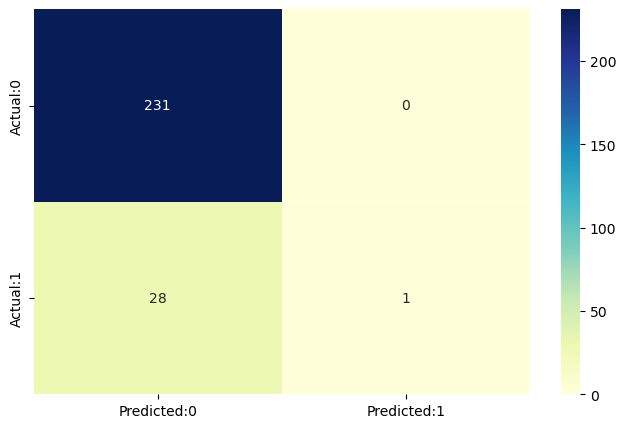

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [29]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [30]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',
      
      'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8923076923076924 
 The Missclassification = 1-Accuracy =  0.10769230769230764 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.034482758620689655 
 Specificity or True Negative Rate = TN/(TN+FP) =  1.0 
 Positive Predictive value = TP/(TP+FP) =  1.0 
 Negative predictive Value = TN/(TN+FN) =  0.8918918918918919 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  inf 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9655172413793104


C:\Users\admin\AppData\Local\Temp\ipykernel_4724\2337807724.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',


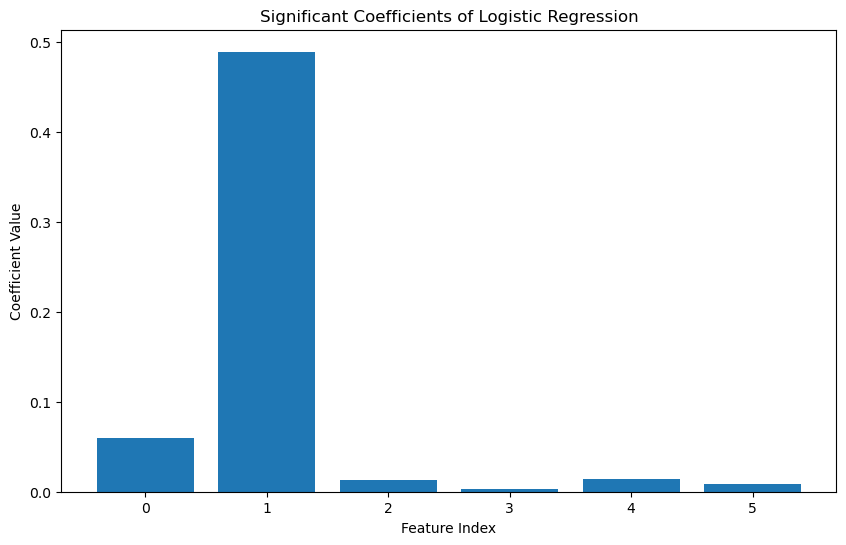

In [31]:
coefficients = logreg.coef_[0]

# Plot the significant coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), range(len(coefficients)))
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Significant Coefficients of Logistic Regression')
plt.show()

In [32]:
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train,y_train)
print("The intercept b0= ", modelLogistic.intercept_)

print("The coefficient b1= ", modelLogistic.coef_)

The intercept b0=  [-8.39727898]
The coefficient b1=  [[0.0599772  0.48869709 0.01289387 0.00277386 0.01444103 0.00836448]]


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train) 
print('prediction with threshold 0.5 :') 
y_pred = lr.predict(x_test) 
print(y_pred) 

prediction with threshold 0.5 :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
print('prediction with threshold 0.9 :') 
y_pred_new_threshold = (lr.predict_proba(x_test)[:, 1] >= 0.9).astype(int) 
print(y_pred_new_threshold)    

prediction with threshold 0.9 :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [36]:
np.array(None)

array(None, dtype=object)

In [37]:
import sklearn.metrics as metrics

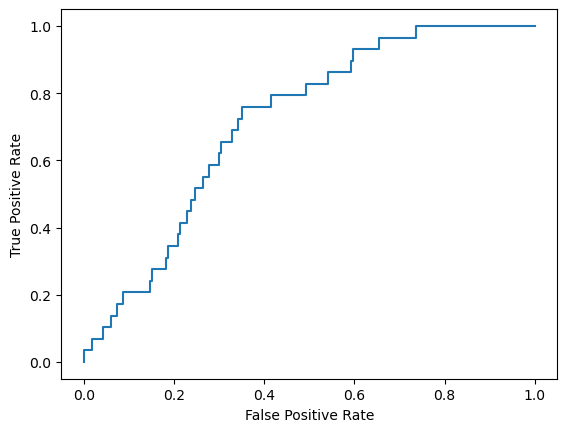

In [38]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()